In [1]:
#ChatGPT: https://chat.openai.com/share/74132e84-b7b2-4696-8d8a-c59eaf3fa426

import pandas as pd
df = pd.read_csv("/content/WeatherDataM.csv")

In [16]:
#1

#check for nulls
print(df.isnull().values.any())
print()

#data summary
print(df.describe())

print()

#average values across
print(df['Temperature (C)'].mean(axis = 0), print(df['Wind Speed (km/h)'].mean(axis = 0)), print(df['Pressure (millibars)'].mean(axis = 0)), print(df['Humidity'].mean(axis = 0)))
print()

#top 5 rows
df.head()

False

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)   Humidity
count        50.000000          50.000000             50.000000  50.000000
mean         13.409111          15.282120           1013.811000   0.661400
std           4.408296           6.066344              3.321718   0.164565
min           6.111111           3.928400           1007.260000   0.360000
25%           9.572222          11.161325           1011.635000   0.532500
50%          13.527778          14.312900           1014.505000   0.665000
75%          17.286111          19.955950           1016.350000   0.815000
max          21.183333          28.368200           1017.740000   0.950000

15.282119999999999
1013.8110000000001
0.6614000000000001
13.40911111076 None None None



,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


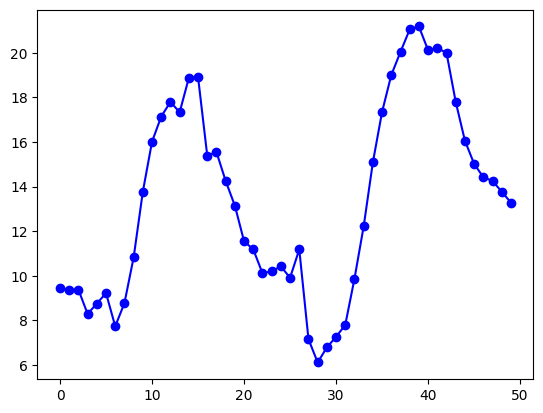

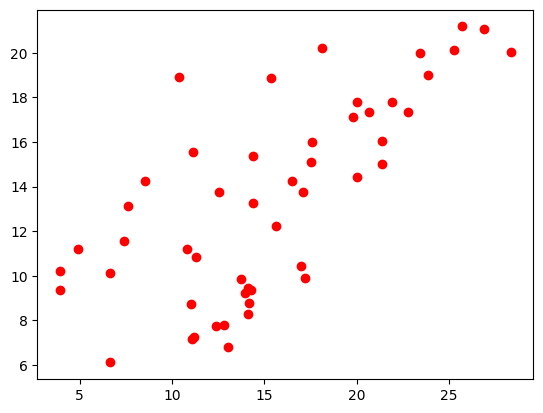

<Axes: ylabel='Wind Speed (km/h)'>

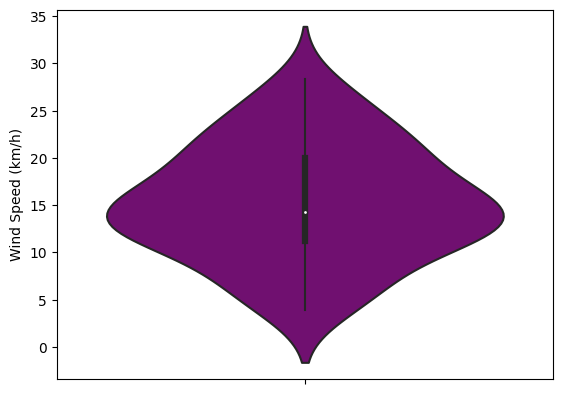

In [26]:
#2
import seaborn as sns
import matplotlib.pyplot as plt

#assumption: dataset is indexed chronologically

#i : Line plot for temperature over time
plt.plot(df['Temperature (C)'], marker='o', linestyle='-', color='b')
plt.show()

#ii: scatter plot for temperature and wind speed
plt.scatter(df['Wind Speed (km/h)'], df['Temperature (C)'], color='r')
plt.show()

#iii: violin plot for windspeed
sns.violinplot(y= df['Wind Speed (km/h)'], color='purple')


In [27]:
#3
import statsmodels.api as sm

X = sm.add_constant(df[['Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity']])
y = df['Temperature (C)']

# Fit the model
model = sm.OLS(y, X).fit()

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.58e-23
Time:                        15:35:16   Log-Likelihood:                -86.280
No. Observations:                  50   AIC:                             180.6
Df Residuals:                      46   BIC:                             188.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -144.3896 